# UTS

<b>IDENTITAS</b>

NIM: 2041720107

Nama: Gustania Nirmala Meisi

Kelas: TI-3H

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('dataset_4.csv')
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35,PM10,BAIK


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   155 non-null    object
 1   stasiun   155 non-null    object
 2   pm10      155 non-null    object
 3   so2       155 non-null    object
 4   co        155 non-null    object
 5   o3        155 non-null    object
 6   no2       155 non-null    object
 7   max       155 non-null    int64 
 8   critical  155 non-null    object
 9   categori  155 non-null    object
dtypes: int64(1), object(9)
memory usage: 12.2+ KB


,max
count,155.000000
mean,55.567742
std,18.538489
min,25.000000
25%,41.000000
50%,51.000000
75%,65.000000
max,125.000000


In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

# Terpakan label encoder
data['stasiun'] = encode.fit_transform(data['stasiun'])
data['pm10'] = encode.fit_transform(data['pm10'])
data['so2'] = encode.fit_transform(data['so2'])
data['co'] = encode.fit_transform(data['co'])
data['o3'] = encode.fit_transform(data['o3'])
data['no2'] = encode.fit_transform(data['no2'])
data['critical'] = encode.fit_transform(data['critical'])
data['categori'] = encode.fit_transform(data['categori'])
# Cek hasil
# print(msh.describe())
data
# msh.replace([np.inf, -np.inf], np.nan, inplace=True)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,0,8,11,1,16,18,32,1,0
1,2020-01-02,0,6,13,3,13,17,29,1,0
2,2020-01-03,0,17,13,5,16,1,39,2,0
3,2020-01-04,0,12,13,5,22,1,38,1,0
4,2020-01-05,0,13,13,3,15,18,35,2,0
...,...,...,...,...,...,...,...,...,...,...
150,2020-01-27,4,9,5,8,39,16,58,1,1
151,2020-01-28,4,43,7,25,46,18,65,2,1
152,2020-01-29,4,34,8,16,51,14,73,1,1
153,2020-01-30,4,6,10,7,42,17,61,1,1


c:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


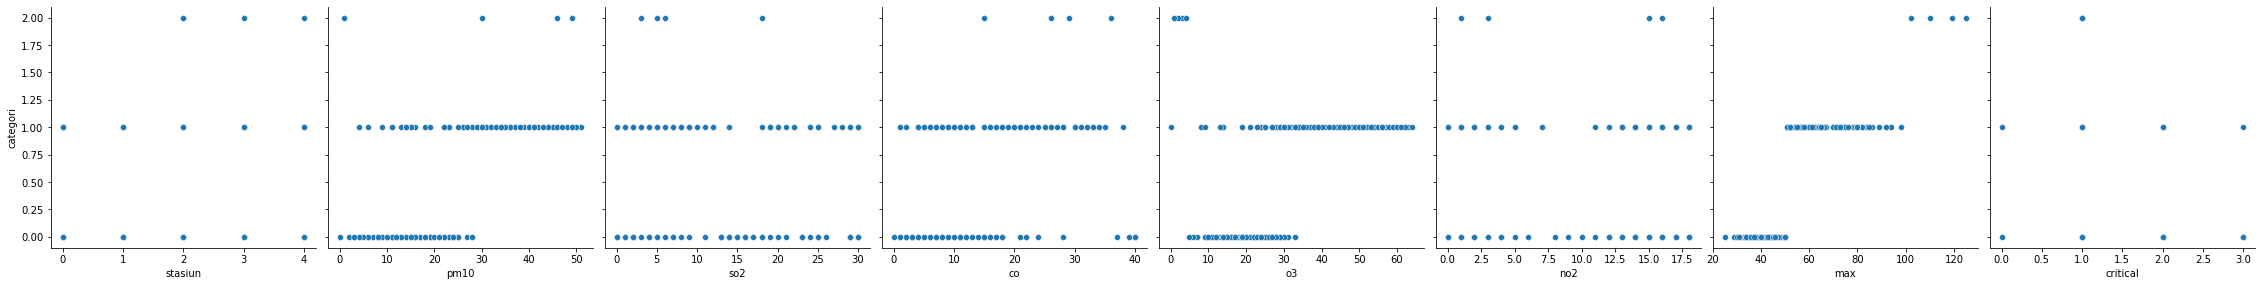

In [6]:
# operasi visualisasi
sns.pairplot(data, x_vars=['stasiun','pm10', 'so2','co','o3','no2','max','critical'], 
             y_vars='categori', size=4, aspect=1, kind='scatter')
plt.show()

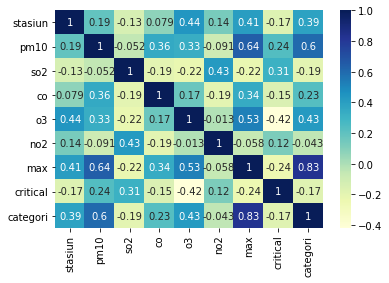

In [7]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

regresi linear

In [8]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['max']
y = data['categori']

In [9]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [10]:
# hasil training dtaset
X_train
y_train

6      0
25     1
21     0
51     0
96     1
      ..
87     1
103    0
67     1
24     0
8      1
Name: categori, Length: 108, dtype: int32

In [11]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [12]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const   -0.801788
max      0.025392
dtype: float64

In [13]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               categori   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           8.09e-27
Time:                        12:49:35   Log-Likelihood:                -25.994
No. Observations:                 108   AIC:                             55.99
Df Residuals:                     106   BIC:                             61.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8018      0.100     -8.037      0.000      -1.000      -0.604
max            0.0254      0.002     14.456      0.000       0.022       0.029
==============================================================================
Omnibus:                       19.847   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.719
Skew:                           0.208   Prob(JB):                       0.0573
Kurtosis:                       1.952   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

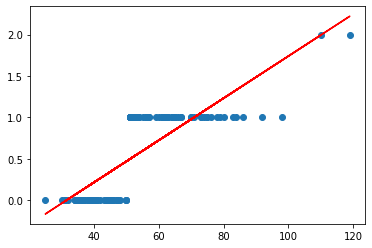

In [15]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, -0.8018 + 0.0254*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [16]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


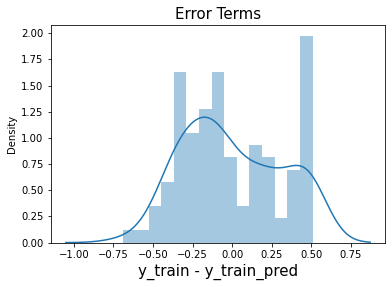

In [17]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

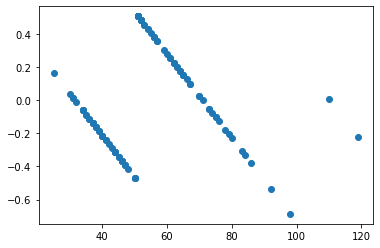

In [18]:
plt.scatter(X_train,res)
plt.show()

In [19]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

45     0.137710
11     0.036143
120    1.026425
15     0.721723
125    1.788181
dtype: float64

In [20]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7197570964851061

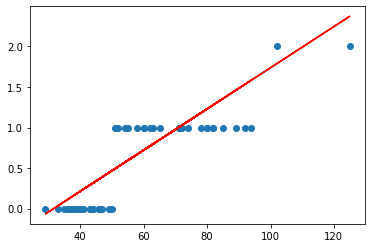

In [21]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()